# Week2授業前課題2 ダミーデータの作成

## 1.このテキストについて

テキストの目的
数式演算ライブラリのNumPyに慣れる
グラフの表示に慣れる

どのように学ぶか
ヒントを示すので、それに従いデータの作成と作図を行っていきます。

## 2.ダミーデータの作成

機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。


散布図で描くと次のようになるデータを作っていきます。

<img src="DIC_Week2_授業前課題_ダミーデータ作成.png">

## 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[
1.0
0.8
0.8
1.0

]

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。


numpy.random.multivariate_normal — NumPy v1.16 Manual


作成したndarrayのshapeは(500, 2)になります。


《シード値について》


実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。



In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
mean1 = np.array([-3, 0])
cov1 = np.array([[1.0, 0.8],[0.8, 1.0]])

# 平均(-3,0)の共分散行列
data1 = np.random.multivariate_normal(mean1, cov1, size=500)
print(data1.shape)
# print(data1)

(500, 2)


## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。


散布図はmatplotlibのplt.scatter()を使うことで描けます。


matplotlib.pyplot.scatter — Matplotlib 3.1.1 documentation

《作成例》
<img src="DIC_Week2_授業前課題_ダミー作成　散布図.png">

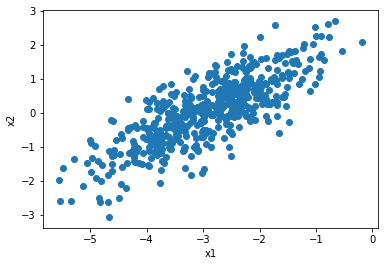

In [12]:
#散布図
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(data1[:, 0],data1[:, 1])
plt.show()

## 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。


ヒストグラムはplt.hist()を使うことで描けます。


matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation


各次元ごとに作成し、2つのヒストグラムとしてください。


それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。


matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation


《作成例》



<img src="DIC_Week2_授業前課題_ダミー作成　ヒストグラム.png">

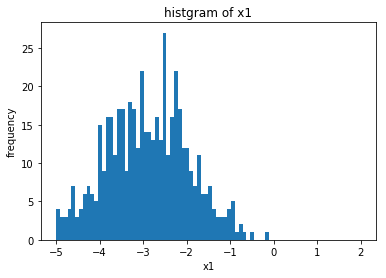

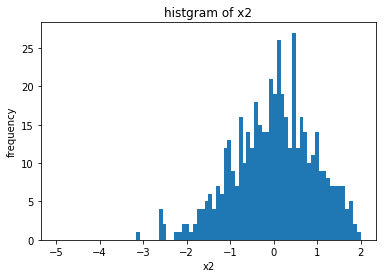

In [30]:
# ヒストグラム描画
plt.title("histgram of x1")
plt.xlabel("x1")
plt.ylabel("frequency")
plt.hist(data1[:, 0], range=(-5, 2), bins=80)

plt.show()

plt.title("histgram of x2")
plt.xlabel("x2")
plt.ylabel("frequency")
plt.hist(data1[:, 1], range=(-5, 2), bins=80)

plt.show()

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[
1.0
0.8
0.8
1.0

]

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。


《作成例》


課題のはじめに紹介した図と同じものです。

<img src="DIC_Week2_授業前課題_ダミーデータ作成.png">

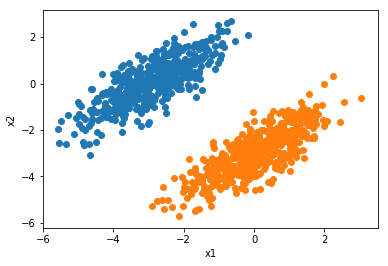

In [39]:
mean2 = np.array([0, -3])
cov2 = np.array([[1.0, 0.8],[0.8, 1.0]])

# 平均(０,-3) の共分散行列
data2 = np.random.multivariate_normal(mean2, cov2, size=500)
# print(data2.shape)
# print(data1)

#data1とdata2の散布図
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()

## 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。


numpy.concatenate — NumPy v1.16 Manual


numpy.vsplit — NumPy v1.16 Manual

In [42]:
# データ結合
data3 = np.concatenate([data1, data2], axis=0)
print(data3.shape)

(1000, 2)


## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。


0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。


機械学習に使用するデータセットはこのような形になっていることが多いです。


《作成例》


データが3個+3個の場合は以下のような(6, 3)のndarrayになります。

<img src="DIC_Week2_授業前課題_ダミー作成　ダミーデータ.png">

In [45]:
# ラベル付け
data1_rabel = np.insert(data1, 2, 0, axis=1)
data2_rabel = np.insert(data2, 2, 1, axis=1)
data3_rabel = np.concatenate([data1_rabel, data2_rabel],axis=0)

print(data3_rabel)
print(data3_rabel.shape)


[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.36125328 -4.5055435   1.        ]
 [-0.20363443 -2.87673577  1.        ]
 [-0.37926757 -2.55826981  1.        ]]
(1000, 3)


## 参考
numpy.random.multivariate_normalについて　https://analytics-note.xyz/programming/python-multivariate-normal-rvs/
matplotlibについて　https://qiita.com/nkay/items/d1eb91e33b9d6469ef51
問題７）numpyの列追加について　https://note.nkmk.me/python-numpy-insert/
問題７）numpyの置換について　https://note.nkmk.me/python-numpy-where/

## 備忘録
作成時間：２時間